# LSTM

Data being read includes precipitation, gage height, river discharge, and longitude/latitude


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, TimeDistributed, RepeatVector
import keras
#from keras.src.preprocessing.sequence import TimeseriesGenerator
#from google.colab import drive
#drive.mount('/Colab_Notebooks')

/opt/conda/envs/umd-spring-2024/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-05-09 13:15:47.184343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 13:15:48.319185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
pwd

'/share/bgramp'

In [3]:
# reading datasets
dataset1 = pd.read_csv(
    '01302020PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo1 = pd.read_csv(
    '01302020Discharge2010-2023.csv',
    delimiter=',')
datasetthree1 = pd.read_csv(
    '01302020GageHeight2010-2023.csv',
    delimiter=',')
dataset2 = pd.read_csv(
    '01303000PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo2 = pd.read_csv(
    '01303000Discharge2010-2023.csv',
    delimiter=',')
datasetthree2 = pd.read_csv(
    '01303000GageHeight2010-2023.csv',
    delimiter=',')
dataset3 = pd.read_csv(
    '01303500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo3 = pd.read_csv(
    '01303500Discharge2010-2023.csv',
    delimiter=',')
datasetthree3 = pd.read_csv(
    '01303500GageHeight2010-2023.csv',
    delimiter=',')
dataset4 = pd.read_csv(
    '01305500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo4 = pd.read_csv(
    '01305500Discharge2010-2023.csv',
    delimiter=',')
datasetthree4 = pd.read_csv(
    '01305500GageHeight2010-2023.csv',
    delimiter=',')
dataset5 = pd.read_csv(
    '01306460PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo5 = pd.read_csv(
    '01306460Discharge2010-2023.csv',
    delimiter=',')
datasetthree5 = pd.read_csv(
    '01306460GageHeight2010-2023.csv',
    delimiter=',')
dataset6 = pd.read_csv(
    '01308500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo6 = pd.read_csv(
    '01308500Discharge2010-2023.csv',
    delimiter=',')
datasetthree6 = pd.read_csv(
    '01308500GageHeight2010-2023.csv',
    delimiter=',')
dataset7 = pd.read_csv(
    '01309500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo7 = pd.read_csv(
    '01309500Discharge2010-2023.csv',
    delimiter=',')
datasetthree7 = pd.read_csv(
    '01309500GageHeight2010-2023.csv',
    delimiter=',')
dataset8 = pd.read_csv(
    '01309950PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo8 = pd.read_csv(
    '01309950Discharge2010-2023.csv',
    delimiter=',')
datasetthree8 = pd.read_csv(
    '01309950GageHeight2010-2023.csv',
    delimiter=',')
dataset9 = pd.read_csv(
    '01309990PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo9 = pd.read_csv(
    '01309990Discharge2010-2023.csv',
    delimiter=',')
datasetthree9 = pd.read_csv(
    '01309990GageHeight2010-2023.csv',
    delimiter=',')
dataset10 = pd.read_csv(
    '01310500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo10 = pd.read_csv(
    '01310500Discharge2010-2023.csv',
    delimiter=',')
datasetthree10 = pd.read_csv(
    '01310500GageHeight2010-2023.csv',
    delimiter=',')
dataset11 = pd.read_csv(
    '01311500PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo11 = pd.read_csv(
    '01311500Discharge2010-2023.csv',
    delimiter=',')
datasetthree11 = pd.read_csv(
    '01311500GageHeight2010-2023.csv',
    delimiter=',')

/tmp/ipykernel_122/3825804853.py:98: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  datasetthree11 = pd.read_csv(


In [4]:
dataset1.head()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
0,2009,12,31,19,0.14,0
1,2009,12,31,20,0.28,4
2,2009,12,31,21,0.33,8
3,2009,12,31,22,0.28,12
4,2009,12,31,23,0.22,16


In [5]:
datasettwo1.head()

,agency_cd,site_no,datetime,tz_cd,106410_00060,106410_00060_cd,Time,Time2
0,USGS,1302020,1/1/2010 0:00,EST,94.9,A,40179.000000,0.0
1,USGS,1302020,1/1/2010 0:15,EST,94.9,A,40179.010416,1.0
2,USGS,1302020,1/1/2010 0:30,EST,94.9,A,40179.020833,2.0
3,USGS,1302020,1/1/2010 0:45,EST,94.9,A,40179.031250,3.0
4,USGS,1302020,1/1/2010 1:00,EST,94.9,A,40179.041666,4.0


In [6]:
datasetthree1.head()

,agency_cd,site_no,datetime,tz_cd,106409_00065,106409_00065_cd,Time,Time2
0,USGS,1302020,1/1/2010 0:00,EST,0.97,A,40179.000000,0.0
1,USGS,1302020,1/1/2010 0:15,EST,0.97,A,40179.010416,1.0
2,USGS,1302020,1/1/2010 0:30,EST,0.97,A,40179.020833,2.0
3,USGS,1302020,1/1/2010 0:45,EST,0.97,A,40179.031250,3.0
4,USGS,1302020,1/1/2010 1:00,EST,0.97,A,40179.041666,4.0


In [7]:
dataset1.tail()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
122707,2023,12,31,14,0.0,490828
122708,2023,12,31,15,0.0,490832
122709,2023,12,31,16,0.0,490836
122710,2023,12,31,17,0.0,490840
122711,2023,12,31,18,0.0,490844


In [8]:
datasettwo1["106410_00060"].tail()

489972    109.0
489973    109.0
489974    109.0
489975    109.0
489976    109.0
Name: 106410_00060, dtype: float64

In [9]:
datasetthree1["106409_00065"].tail()

490179    0.93
490180    0.93
490181    0.93
490182    0.93
490183    0.93
Name: 106409_00065, dtype: float64

In [10]:
# drop any nans
dataset1 = dataset1.dropna(subset=["PRECTOTCORR"])
dataset2 = dataset2.dropna(subset=["PRECTOTCORR"])
dataset3 = dataset3.dropna(subset=["PRECTOTCORR"])
dataset4 = dataset4.dropna(subset=["PRECTOTCORR"])
dataset5 = dataset5.dropna(subset=["PRECTOTCORR"])
dataset6 = dataset6.dropna(subset=["PRECTOTCORR"])
dataset7 = dataset7.dropna(subset=["PRECTOTCORR"])
dataset8 = dataset8.dropna(subset=["PRECTOTCORR"])
dataset9 = dataset9.dropna(subset=["PRECTOTCORR"])
dataset10 = dataset10.dropna(subset=["PRECTOTCORR"])
dataset11 = dataset11.dropna(subset=["PRECTOTCORR"])

In [11]:
dataset1.describe()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
count,122712.000000,122712.000000,122712.00000,122712.000000,122712.000000,122712.000000
mean,2016.499136,6.523372,15.72834,11.500000,0.143851,245422.000000
std,4.030828,3.448596,8.79958,6.922215,0.533112,141696.189815
min,2009.000000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.00000,5.750000,0.000000,122711.000000
50%,2016.000000,7.000000,16.00000,11.500000,0.000000,245422.000000
75%,2020.000000,10.000000,23.00000,17.250000,0.030000,368133.000000
max,2023.000000,12.000000,31.00000,23.000000,19.180000,490844.000000


In [12]:
datasettwo1.describe()

,site_no,106410_00060,Time,Time2
count,489977.0,489977.00000,489977.000000,489977.000000
mean,1302020.0,76.70612,42732.821357,245166.850337
std,0.0,128.36378,1475.420189,141640.338186
min,1302020.0,7.10000,40179.000000,0.000000
25%,1302020.0,28.90000,41455.479166,122542.000000
50%,1302020.0,45.80000,42731.750000,245064.000000
75%,1302020.0,76.60000,44008.822916,367663.000000
max,1302020.0,3000.00000,45291.989583,490847.000000


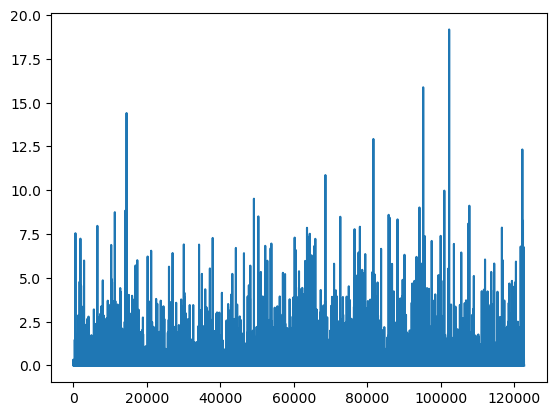

In [13]:
plt.plot(range(122712), dataset1["PRECTOTCORR"])

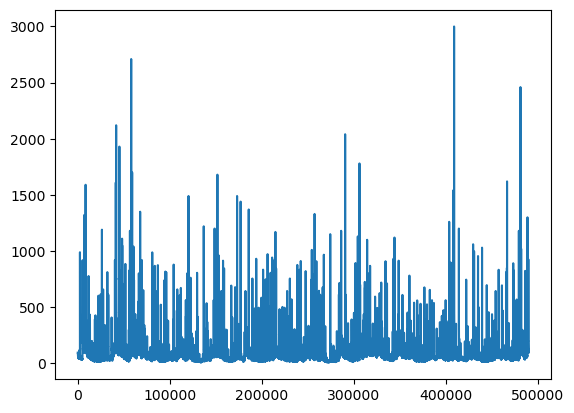

In [14]:
plt.plot(range(489977), datasettwo1["106410_00060"])

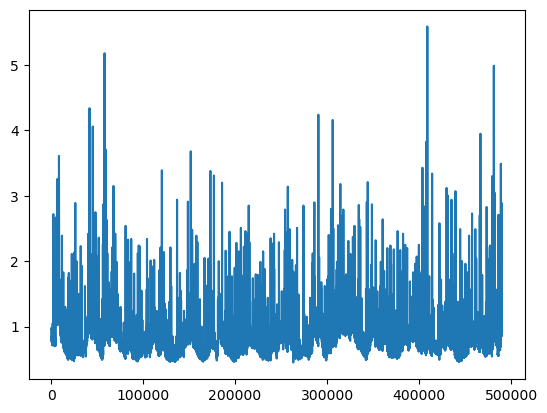

In [15]:
plt.plot(range(490184), datasetthree1["106409_00065"])

In [16]:
k = 0
n = 0
train = []
target = []
for x in dataset1["Time2"]:
  check = []
  try:
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x)[0][0]], 40.8623, -73.8744])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+1)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+1)[0][0]], 40.8623, -73.8744])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+2)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+2)[0][0]], 40.8623, -73.8744])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+3)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+3)[0][0]], 40.8623, -73.8744])
    check.append(datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+5)[0][0]])
    train.append(check[0:4])
    target.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

122395


In [17]:
k = 0
n = 0
train2 = []
target2 = []
for x in dataset2["Time2"]:
  check = []
  try:
    check.append([dataset2["PRECTOTCORR"][np.where(dataset2["Time2"]==x)[0][0]], datasettwo2["201840_0060"][np.where(datasettwo2["Time2"]==x)[0][0]], datasetthree2["201841_00065"][np.where(datasetthree2["Time2"]==x)[0][0]], 40.8874, -73.5632])
    check.append([dataset2["PRECTOTCORR"][np.where(dataset2["Time2"]==x)[0][0]], datasettwo2["201840_0060"][np.where(datasettwo2["Time2"]==x+1)[0][0]], datasetthree2["201841_00065"][np.where(datasetthree2["Time2"]==x+1)[0][0]], 40.8874, -73.5632])
    check.append([dataset2["PRECTOTCORR"][np.where(dataset2["Time2"]==x)[0][0]], datasettwo2["201840_0060"][np.where(datasettwo2["Time2"]==x+2)[0][0]], datasetthree2["201841_00065"][np.where(datasetthree2["Time2"]==x+2)[0][0]], 40.8874, -73.5632])
    check.append([dataset2["PRECTOTCORR"][np.where(dataset2["Time2"]==x)[0][0]], datasettwo2["201840_0060"][np.where(datasettwo2["Time2"]==x+3)[0][0]], datasetthree2["201841_00065"][np.where(datasetthree2["Time2"]==x+3)[0][0]], 40.8874, -73.5632])
    check.append(datasetthree2["201841_00065"][np.where(datasetthree2["Time2"]==x+5)[0][0]])
    train2.append(check[0:4])
    target2.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

30027


In [18]:
k = 0
n = 0
train3 = []
target3 = []
for x in dataset3["Time2"]:
  check = []
  try:
    check.append([dataset3["PRECTOTCORR"][np.where(dataset3["Time2"]==x)[0][0]], datasettwo3["106444_00060"][np.where(datasettwo3["Time2"]==x)[0][0]], datasetthree3["241896_00065"][np.where(datasetthree3["Time2"]==x)[0][0]], 40.8572, -73.4636])
    check.append([dataset3["PRECTOTCORR"][np.where(dataset3["Time2"]==x)[0][0]], datasettwo3["106444_00060"][np.where(datasettwo3["Time2"]==x+1)[0][0]], datasetthree3["241896_00065"][np.where(datasetthree3["Time2"]==x+1)[0][0]], 40.8572, -73.4636])
    check.append([dataset3["PRECTOTCORR"][np.where(dataset3["Time2"]==x)[0][0]], datasettwo3["106444_00060"][np.where(datasettwo3["Time2"]==x+2)[0][0]], datasetthree3["241896_00065"][np.where(datasetthree3["Time2"]==x+2)[0][0]], 40.8572, -73.4636])
    check.append([dataset3["PRECTOTCORR"][np.where(dataset3["Time2"]==x)[0][0]], datasettwo3["106444_00060"][np.where(datasettwo3["Time2"]==x+3)[0][0]], datasetthree3["241896_00065"][np.where(datasetthree3["Time2"]==x+3)[0][0]], 40.8572, -73.4636])
    check.append(datasetthree3["241896_00065"][np.where(datasetthree3["Time2"]==x+5)[0][0]])
    train3.append(check[0:4])
    target3.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

105000


In [19]:
k = 0
n = 0
train4 = []
target4 = []
for x in dataset4["Time2"]:
  check = []
  try:
    check.append([dataset4["PRECTOTCORR"][np.where(dataset4["Time2"]==x)[0][0]], datasettwo4["172577_00060"][np.where(datasettwo4["Time2"]==x)[0][0]], datasetthree4["250916_00065"][np.where(datasetthree4["Time2"]==x)[0][0]], 40.7672, -72.9938])
    check.append([dataset4["PRECTOTCORR"][np.where(dataset4["Time2"]==x)[0][0]], datasettwo4["172577_00060"][np.where(datasettwo4["Time2"]==x+1)[0][0]], datasetthree4["250916_00065"][np.where(datasetthree4["Time2"]==x+1)[0][0]], 40.7672, -72.9938])
    check.append([dataset4["PRECTOTCORR"][np.where(dataset4["Time2"]==x)[0][0]], datasettwo4["172577_00060"][np.where(datasettwo4["Time2"]==x+2)[0][0]], datasetthree4["250916_00065"][np.where(datasetthree4["Time2"]==x+2)[0][0]], 40.7672, -72.9938])
    check.append([dataset4["PRECTOTCORR"][np.where(dataset4["Time2"]==x)[0][0]], datasettwo4["172577_00060"][np.where(datasettwo4["Time2"]==x+3)[0][0]], datasetthree4["250916_00065"][np.where(datasetthree4["Time2"]==x+3)[0][0]], 40.7672, -72.9938])
    check.append(datasetthree4["250916_00065"][np.where(datasetthree4["Time2"]==x+5)[0][0]])
    train4.append(check[0:4])
    target4.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

107449


In [20]:
k = 0
n = 0
train5 = []
target5 = []
for x in dataset5["Time2"]:
  check = []
  try:
    check.append([dataset5["PRECTOTCORR"][np.where(dataset5["Time2"]==x)[0][0]], datasettwo5["106542_00060"][np.where(datasettwo5["Time2"]==x)[0][0]], datasetthree5["106543_00065"][np.where(datasetthree5["Time2"]==x)[0][0]], 40.7723, -73.1587])
    check.append([dataset5["PRECTOTCORR"][np.where(dataset5["Time2"]==x)[0][0]], datasettwo5["106542_00060"][np.where(datasettwo5["Time2"]==x+1)[0][0]], datasetthree5["106543_00065"][np.where(datasetthree5["Time2"]==x+1)[0][0]], 40.7723, -73.1587])
    check.append([dataset5["PRECTOTCORR"][np.where(dataset5["Time2"]==x)[0][0]], datasettwo5["106542_00060"][np.where(datasettwo5["Time2"]==x+2)[0][0]], datasetthree5["106543_00065"][np.where(datasetthree5["Time2"]==x+2)[0][0]], 40.7723, -73.1587])
    check.append([dataset5["PRECTOTCORR"][np.where(dataset5["Time2"]==x)[0][0]], datasettwo5["106542_00060"][np.where(datasettwo5["Time2"]==x+3)[0][0]], datasetthree5["106543_00065"][np.where(datasetthree5["Time2"]==x+3)[0][0]], 40.7723, -73.1587])
    check.append(datasetthree5["106543_00065"][np.where(datasetthree5["Time2"]==x+5)[0][0]])
    train5.append(check[0:4])
    target5.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

121945


In [21]:
k = 0
n = 0
train6 = []
target6 = []
for x in dataset6["Time2"]:
  check = []
  try:
    check.append([dataset6["PRECTOTCORR"][np.where(dataset6["Time2"]==x)[0][0]], datasettwo6["106546_00060"][np.where(datasettwo6["Time2"]==x)[0][0]], datasetthree6["106547_00065"][np.where(datasetthree6["Time2"]==x)[0][0]], 40.709, -73.3288])
    check.append([dataset6["PRECTOTCORR"][np.where(dataset6["Time2"]==x)[0][0]], datasettwo6["106546_00060"][np.where(datasettwo6["Time2"]==x+1)[0][0]], datasetthree6["106547_00065"][np.where(datasetthree6["Time2"]==x+1)[0][0]], 40.709, -73.3288])
    check.append([dataset6["PRECTOTCORR"][np.where(dataset6["Time2"]==x)[0][0]], datasettwo6["106546_00060"][np.where(datasettwo6["Time2"]==x+2)[0][0]], datasetthree6["106547_00065"][np.where(datasetthree6["Time2"]==x+2)[0][0]], 40.709, -73.3288])
    check.append([dataset6["PRECTOTCORR"][np.where(dataset6["Time2"]==x)[0][0]], datasettwo6["106546_00060"][np.where(datasettwo6["Time2"]==x+3)[0][0]], datasetthree6["106547_00065"][np.where(datasetthree6["Time2"]==x+3)[0][0]], 40.709, -73.3288])
    check.append(datasetthree6["106547_00065"][np.where(datasetthree6["Time2"]==x+5)[0][0]])
    train6.append(check[0:4])
    target6.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

86955


In [22]:
k = 0
n = 0
train7 = []
target7 = []
for x in dataset7["Time2"]:
  check = []
  try:
    check.append([dataset7["PRECTOTCORR"][np.where(dataset7["Time2"]==x)[0][0]], datasettwo7["106556_00060"][np.where(datasettwo7["Time2"]==x)[0][0]], datasetthree7["106557_00065"][np.where(datasetthree7["Time2"]==x)[0][0]], 40.689, -73.4554])
    check.append([dataset7["PRECTOTCORR"][np.where(dataset7["Time2"]==x)[0][0]], datasettwo7["106556_00060"][np.where(datasettwo7["Time2"]==x+1)[0][0]], datasetthree7["106557_00065"][np.where(datasetthree7["Time2"]==x+1)[0][0]], 40.689, -73.4554])
    check.append([dataset7["PRECTOTCORR"][np.where(dataset7["Time2"]==x)[0][0]], datasettwo7["106556_00060"][np.where(datasettwo7["Time2"]==x+2)[0][0]], datasetthree7["106557_00065"][np.where(datasetthree7["Time2"]==x+2)[0][0]], 40.689, -73.4554])
    check.append([dataset7["PRECTOTCORR"][np.where(dataset7["Time2"]==x)[0][0]], datasettwo7["106556_00060"][np.where(datasettwo7["Time2"]==x+3)[0][0]], datasetthree7["106557_00065"][np.where(datasetthree7["Time2"]==x+3)[0][0]], 40.689, -73.4554])
    check.append(datasetthree7["106557_00065"][np.where(datasetthree7["Time2"]==x+5)[0][0]])
    train7.append(check[0:4])
    target7.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

102967


In [23]:
k = 0
n = 0
train8 = []
target8 = []
for x in dataset8["Time2"]:
  check = []
  try:
    check.append([dataset8["PRECTOTCORR"][np.where(dataset8["Time2"]==x)[0][0]], datasettwo8["106560_00060"][np.where(datasettwo8["Time2"]==x)[0][0]], datasetthree8["106561_00065"][np.where(datasetthree8["Time2"]==x)[0][0]], 40.6787, -73.5159])
    check.append([dataset8["PRECTOTCORR"][np.where(dataset8["Time2"]==x)[0][0]], datasettwo8["106560_00060"][np.where(datasettwo8["Time2"]==x+1)[0][0]], datasetthree8["106561_00065"][np.where(datasetthree8["Time2"]==x+1)[0][0]], 40.6787, -73.5159])
    check.append([dataset8["PRECTOTCORR"][np.where(dataset8["Time2"]==x)[0][0]], datasettwo8["106560_00060"][np.where(datasettwo8["Time2"]==x+2)[0][0]], datasetthree8["106561_00065"][np.where(datasetthree8["Time2"]==x+2)[0][0]], 40.6787, -73.5159])
    check.append([dataset8["PRECTOTCORR"][np.where(dataset8["Time2"]==x)[0][0]], datasettwo8["106560_00060"][np.where(datasettwo8["Time2"]==x+3)[0][0]], datasetthree8["106561_00065"][np.where(datasetthree8["Time2"]==x+3)[0][0]], 40.6787, -73.5159])
    check.append(datasetthree8["106561_00065"][np.where(datasetthree8["Time2"]==x+5)[0][0]])
    train8.append(check[0:4])
    target8.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

86678


In [24]:
k = 0
n = 0
train9 = []
target9 = []
for x in dataset9["Time2"]:
  check = []
  try:
    check.append([dataset9["PRECTOTCORR"][np.where(dataset9["Time2"]==x)[0][0]], datasettwo9["172625_00060"][np.where(datasettwo9["Time2"]==x)[0][0]], datasetthree9["172626_00065"][np.where(datasetthree9["Time2"]==x)[0][0]], 40.680, -73.513])
    check.append([dataset9["PRECTOTCORR"][np.where(dataset9["Time2"]==x)[0][0]], datasettwo9["172625_00060"][np.where(datasettwo9["Time2"]==x+1)[0][0]], datasetthree9["172626_00065"][np.where(datasetthree9["Time2"]==x+1)[0][0]], 40.680, -73.513])
    check.append([dataset9["PRECTOTCORR"][np.where(dataset9["Time2"]==x)[0][0]], datasettwo9["172625_00060"][np.where(datasettwo9["Time2"]==x+2)[0][0]], datasetthree9["172626_00065"][np.where(datasetthree9["Time2"]==x+2)[0][0]], 40.680, -73.513])
    check.append([dataset9["PRECTOTCORR"][np.where(dataset9["Time2"]==x)[0][0]], datasettwo9["172625_00060"][np.where(datasettwo9["Time2"]==x+3)[0][0]], datasetthree9["172626_00065"][np.where(datasetthree9["Time2"]==x+3)[0][0]], 40.680, -73.513])
    check.append(datasetthree9["172626_00065"][np.where(datasetthree9["Time2"]==x+5)[0][0]])
    train9.append(check[0:4])
    target9.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

64119


In [25]:
k = 0
n = 0
train10 = []
target10 = []
for x in dataset10["Time2"]:
  check = []
  try:
    check.append([dataset10["PRECTOTCORR"][np.where(dataset10["Time2"]==x)[0][0]], datasettwo10["172627_00060"][np.where(datasettwo10["Time2"]==x)[0][0]], datasetthree10["251639_00065"][np.where(datasetthree10["Time2"]==x)[0][0]], 40.6656, -73.5701])
    check.append([dataset10["PRECTOTCORR"][np.where(dataset10["Time2"]==x)[0][0]], datasettwo10["172627_00060"][np.where(datasettwo10["Time2"]==x+1)[0][0]], datasetthree10["251639_00065"][np.where(datasetthree10["Time2"]==x+1)[0][0]], 40.6656, -73.5701])
    check.append([dataset10["PRECTOTCORR"][np.where(dataset10["Time2"]==x)[0][0]], datasettwo10["172627_00060"][np.where(datasettwo10["Time2"]==x+2)[0][0]], datasetthree10["251639_00065"][np.where(datasetthree10["Time2"]==x+2)[0][0]], 40.6656, -73.5701])
    check.append([dataset10["PRECTOTCORR"][np.where(dataset10["Time2"]==x)[0][0]], datasettwo10["172627_00060"][np.where(datasettwo10["Time2"]==x+3)[0][0]], datasetthree10["251639_00065"][np.where(datasetthree10["Time2"]==x+3)[0][0]], 40.6656, -73.5701])
    check.append(datasetthree10["251639_00065"][np.where(datasetthree10["Time2"]==x+5)[0][0]])
    train10.append(check[0:4])
    target10.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

53287


In [26]:
k = 0
n = 0
train11 = []
target11 = []
for x in dataset11["Time2"]:
  check = []
  try:
    check.append([dataset11["PRECTOTCORR"][np.where(dataset11["Time2"]==x)[0][0]], datasettwo11["106624_00060"][np.where(datasettwo11["Time2"]==x)[0][0]], datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==x)[0][0]], 40.6638, -73.7045])
    check.append([dataset11["PRECTOTCORR"][np.where(dataset11["Time2"]==x)[0][0]], datasettwo11["106624_00060"][np.where(datasettwo11["Time2"]==x+1)[0][0]], datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==x+1)[0][0]], 40.6638, -73.7045])
    check.append([dataset11["PRECTOTCORR"][np.where(dataset11["Time2"]==x)[0][0]], datasettwo11["106624_00060"][np.where(datasettwo11["Time2"]==x+2)[0][0]], datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==x+2)[0][0]], 40.6638, -73.7045])
    check.append([dataset11["PRECTOTCORR"][np.where(dataset11["Time2"]==x)[0][0]], datasettwo11["106624_00060"][np.where(datasettwo11["Time2"]==x+3)[0][0]], datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==x+3)[0][0]], 40.6638, -73.7045])
    check.append(datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==x+5)[0][0]])
    train11.append(check[0:4])
    target11.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

119267


In [27]:
datasetthree11["106625_00065"][np.where(datasetthree11["Time2"]==490000)[0][0]]

'1.16'

In [28]:
datasettwo10["172627_00060"][np.where(datasettwo10["Time2"]==490000)[0][0]]

8.7

In [29]:
datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==490000)[0][0]]

0.95

In [30]:
#free up memory
del dataset1
del datasettwo1
del datasetthree1
del dataset2
del datasettwo2
del datasetthree2
del dataset3
del datasettwo3
del datasetthree3
del dataset4
del datasettwo4
del datasetthree4
del dataset5
del datasettwo5
del datasetthree5
del dataset6
del datasettwo6
del datasetthree6
del dataset7
del datasettwo7
del datasetthree7
del dataset8
del datasettwo8
del datasetthree8
del dataset9
del datasettwo9
del datasetthree9
del dataset10
del datasettwo10
del datasetthree10
del dataset11
del datasettwo11
del datasetthree11

In [31]:
len(train)

122395

In [32]:
len(train2)

30027

In [33]:
len(target)

122395

In [34]:
len(target2)

30027

In [35]:
# train test split by years
trainds = train[0:math.ceil(0.75*len(train))]
traintargetds = target[0:math.ceil(0.75*len(target))]
testds = train[math.ceil(0.75*len(train)):]
testtargetds = target[math.ceil(0.75*len(target)):]
trainds2 = train2[0:math.ceil(0.75*len(train2))]
traintargetds2 = target2[0:math.ceil(0.75*len(target2))]
testds2 = train2[math.ceil(0.75*len(train2)):]
testtargetds2 = target2[math.ceil(0.75*len(target2)):]
trainds3 = train3[0:math.ceil(0.75*len(train3))]
traintargetds3 = target3[0:math.ceil(0.75*len(target3))]
testds3 = train3[math.ceil(0.75*len(train3)):]
testtargetds3 = target3[math.ceil(0.75*len(target3)):]
trainds4 = train4[0:math.ceil(0.75*len(train4))]
traintargetds4 = target4[0:math.ceil(0.75*len(target4))]
testds4 = train4[math.ceil(0.75*len(train4)):]
testtargetds4 = target4[math.ceil(0.75*len(target4)):]
trainds5 = train5[0:math.ceil(0.75*len(train5))]
traintargetds5 = target5[0:math.ceil(0.75*len(target5))]
testds5 = train5[math.ceil(0.75*len(train5)):]
testtargetds5 = target5[math.ceil(0.75*len(target5)):]
trainds6 = train6[0:math.ceil(0.75*len(train6))]
traintargetds6 = target6[0:math.ceil(0.75*len(target6))]
testds6 = train6[math.ceil(0.75*len(train6)):]
testtargetds6 = target6[math.ceil(0.75*len(target6)):]
trainds7 = train7[0:math.ceil(0.75*len(train7))]
traintargetds7 = target7[0:math.ceil(0.75*len(target7))]
testds7 = train7[math.ceil(0.75*len(train7)):]
testtargetds7 = target7[math.ceil(0.75*len(target7)):]
trainds8 = train8[0:math.ceil(0.75*len(train8))]
traintargetds8 = target8[0:math.ceil(0.75*len(target8))]
testds8 = train8[math.ceil(0.75*len(train8)):]
testtargetds8 = target8[math.ceil(0.75*len(target8)):]
trainds9 = train9[0:math.ceil(0.75*len(train9))]
traintargetds9 = target9[0:math.ceil(0.75*len(target9))]
testds9 = train9[math.ceil(0.75*len(train9)):]
testtargetds9 = target9[math.ceil(0.75*len(target9)):]
trainds10 = train10[0:math.ceil(0.75*len(train10))]
traintargetds10 = target10[0:math.ceil(0.75*len(target10))]
testds10 = train10[math.ceil(0.75*len(train10)):]
testtargetds10 = target10[math.ceil(0.75*len(target10)):]
trainds11 = train11[0:math.ceil(0.75*len(train11))]
traintargetds11 = target11[0:math.ceil(0.75*len(target11))]
testds11 = train11[math.ceil(0.75*len(train11)):]
testtargetds11 = target11[math.ceil(0.75*len(target11)):]
for n in range(len(trainds2)):
  trainds.append(trainds2[n])
for n in range(len(trainds3)):
  trainds.append(trainds3[n])
for n in range(len(trainds4)):
  trainds.append(trainds4[n])
for n in range(len(trainds5)):
  trainds.append(trainds5[n])
for n in range(len(trainds6)):
  trainds.append(trainds6[n])
for n in range(len(trainds7)):
  trainds.append(trainds7[n])
for n in range(len(trainds8)):
  trainds.append(trainds8[n])
for n in range(len(trainds9)):
  trainds.append(trainds9[n])
for n in range(len(trainds10)):
  trainds.append(trainds10[n])
for n in range(len(trainds11)):
  trainds.append(trainds11[n])
for n in range(len(traintargetds2)):
  traintargetds.append(traintargetds2[n])
for n in range(len(traintargetds3)):
  traintargetds.append(traintargetds3[n])
for n in range(len(traintargetds4)):
  traintargetds.append(traintargetds4[n])
for n in range(len(traintargetds5)):
  traintargetds.append(traintargetds5[n])
for n in range(len(traintargetds6)):
  traintargetds.append(traintargetds6[n])
for n in range(len(traintargetds7)):
  traintargetds.append(traintargetds7[n])
for n in range(len(traintargetds8)):
  traintargetds.append(traintargetds8[n])
for n in range(len(traintargetds9)):
  traintargetds.append(traintargetds9[n])
for n in range(len(traintargetds10)):
  traintargetds.append(traintargetds10[n])
for n in range(len(traintargetds11)):
  traintargetds.append(traintargetds11[n])
traintargetds = [traintargetds]
for n in range(len(testds2)):
  testds.append(testds2[n])
for n in range(len(testds3)):
  testds.append(testds3[n])
for n in range(len(testds4)):
  testds.append(testds4[n])
for n in range(len(testds5)):
  testds.append(testds5[n])
for n in range(len(testds6)):
  testds.append(testds6[n])
for n in range(len(testds7)):
  testds.append(testds7[n])
for n in range(len(testds8)):
  testds.append(testds8[n])
for n in range(len(testds9)):
  testds.append(testds9[n])
for n in range(len(testds10)):
  testds.append(testds10[n])
for n in range(len(testds11)):
  testds.append(testds11[n])
for n in range(len(testtargetds2)):
  testtargetds.append(testtargetds2[n])
for n in range(len(testtargetds3)):
  testtargetds.append(testtargetds3[n])
for n in range(len(testtargetds4)):
  testtargetds.append(testtargetds4[n])
for n in range(len(testtargetds5)):
  testtargetds.append(testtargetds5[n])
for n in range(len(testtargetds6)):
  testtargetds.append(testtargetds6[n])
for n in range(len(testtargetds7)):
  testtargetds.append(testtargetds7[n])
for n in range(len(testtargetds8)):
  testtargetds.append(testtargetds8[n])
for n in range(len(testtargetds9)):
  testtargetds.append(testtargetds9[n])
for n in range(len(testtargetds10)):
  testtargetds.append(testtargetds10[n])
for n in range(len(testtargetds11)):
  testtargetds.append(testtargetds11[n])
#testtargetds = [testtargetds]

In [36]:
len(testds)

250016

In [37]:
testds=testds[0:245000]

In [38]:
testtargetds=testtargetds[0:245000]
testtargetds = [testtargetds]

In [39]:
for m in range(len(trainds)):
  for n in range(4):
    trainds[m][n][1] = (trainds[m][n][1])/3000

for m in range(len(testds)):
  for n in range(4):
    testds[m][n][1] = (testds[m][n][1])/3000

for m in range(len(trainds)):
  for n in range(4):
    trainds[m][n][3] = (trainds[m][n][3] - 40.6638)/(40.8874-40.6638)

for m in range(len(testds)):
  for n in range(4):
    testds[m][n][3] = (testds[m][n][3] - 40.6638)/(40.8874-40.6638)

for m in range(len(trainds)):
  for n in range(4):
    trainds[m][n][4] = (trainds[m][n][4] + 73.8744)/(-72.9938+73.8744)

for m in range(len(testds)):
  for n in range(4):
    testds[m][n][4] = (testds[m][n][4] + 73.8744)/(-72.9938+73.8744)

In [40]:
# train test split by years
#trainds = train[0:90000]
#traintargetds = [target[0:90000]]
#testds = train[90000:]
#testtargetds = [target[90000:]]

In [41]:
trainds = np.array(trainds)
traintargetds = np.array(traintargetds).T
testds = np.array(testds)
testtargetds = np.array(testtargetds).T

In [42]:
testds[200000]

array([[0.00000000e+00, 1.83333333e-04, 2.12000000e+00, 7.24508050e-02,
        4.10401999e-01],
       [0.00000000e+00, 1.83333333e-04, 2.12000000e+00, 7.24508050e-02,
        4.10401999e-01],
       [0.00000000e+00, 1.83333333e-04, 2.12000000e+00, 7.24508050e-02,
        4.10401999e-01],
       [0.00000000e+00, 1.83333333e-04, 2.12000000e+00, 7.24508050e-02,
        4.10401999e-01]])

In [43]:
trainds.shape

(750073, 4, 5)

In [44]:
traintargetds.shape

(750073, 1)

In [45]:
train[5]

[[0.16, 0.0308, 0.96, 0.8877459749552675, 0.0],
 [0.16, 0.0308, 0.96, 0.8877459749552675, 0.0],
 [0.16, 0.0308, 0.96, 0.8877459749552675, 0.0],
 [0.16, 0.0308, 0.96, 0.8877459749552675, 0.0]]

In [46]:
target[5]

0.95

In [47]:
testds.shape

(245000, 4, 5)

In [48]:
print(trainds.shape, testds.shape)

(750073, 4, 5) (245000, 4, 5)


In [49]:
# for help with data manipulation for time series rnn training; we can use the time series generator from keras

# dummy input for understanding
# data = np.array([[i] for i in range(50)])

# here goes our training data
data = trainds

# the shape of your target is your prediction shape (e.g., here we make it 1)
#target = data

# the length of the input feature
n_input=4 # you can change this! doesn't HAVE to be 4 months input
n_features=data.shape[1]*data.shape[2]

# this is the generator that will go into our rnn for training
#data_gen = TimeseriesGenerator(data,
#                               traintargetds,
#                               length=n_input,
#                               sampling_rate=1,
#                               batch_size=1000, # you can try different batch sizes
#                               shuffle=True)

In [50]:
# check shapes
print(data.shape, traintargetds.shape, n_features)

(750073, 4, 5) (750073, 1) 20


In [51]:
# many-to-one example
# lets make our rnn!
regressor = Sequential()

# LSTM; input shape is 1 (for one time step at a time) and n_features which is also 1 for our toy example
regressor.add(keras.layers.Input(shape=(1, 5)))

# don't return sequence; just the last output of the input sequence
regressor.add(LSTM(units=128, return_sequences=False))

regressor.add(Dense(64))
regressor.add(Activation('linear'))

regressor.add(Dense(8))
regressor.add(Activation('linear'))

# one neuron for output prediction
regressor.add(Dense(1))
regressor.add(Activation('linear'))

METRICS = [
    keras.metrics.MeanSquaredError(name='mean_squared_error'),
    keras.metrics.RootMeanSquaredError(name='root_mean_squared_error'),
]

# compile model
regressor.compile(keras.optimizers.Adam(learning_rate=0.002), loss='mean_squared_error', metrics=METRICS)

keras.utils.set_random_seed(1010)

# what does graph look like?
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,393 (302.32 KB)

 Trainable params: 77,393 (302.32 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# train the lstm!
history = regressor.fit(x = trainds, y = traintargetds, validation_split=0.2, epochs=80, batch_size = 2000, shuffle=True)

Epoch 1/80
301/301 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - loss: 0.1184 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.2892 - val_loss: 0.0010 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 2/80
301/301 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - loss: 5.8311e-04 - mean_squared_error: 5.8311e-04 - root_mean_squared_error: 0.0241 - val_loss: 9.6981e-04 - val_mean_squared_error: 9.8246e-04 - val_root_mean_squared_error: 0.0313
Epoch 3/80
301/301 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - loss: 5.4139e-04 - mean_squared_error: 5.4139e-04 - root_mean_squared_error: 0.0233 - val_loss: 9.3382e-04 - val_mean_squared_error: 9.4593e-04 - val_root_mean_squared_error: 0.0308
Epoch 4/80
301/301 ━━━━━━━━━━━━━━━━━━━━ 47s 144ms/step - loss: 5.1837e-04 - mean_squared_error: 5.1837e-04 - root_mean_squared_error: 0.0228 - val_loss: 8.9319e-04 - val_mean_squared_error: 9.0475e-04 - val_root_mean_squared_error: 0.0301
Epoch 5/80
301/301 ━━━━━━━━━━━━━━━━━━━━ 79s 133ms/step - los

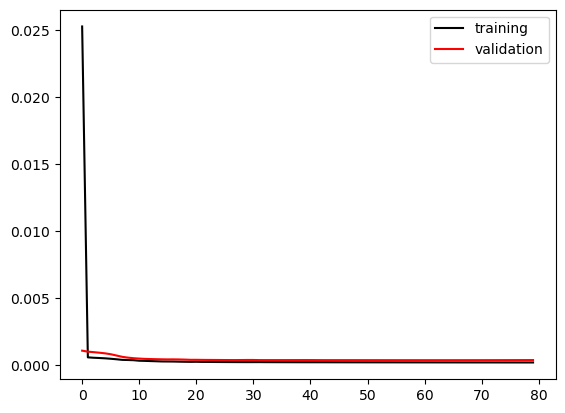

In [53]:
plt.plot(history.history["mean_squared_error"], c='k', label='training')
plt.plot(history.history["val_mean_squared_error"], c='r', label='validation')
plt.legend(['training', 'validation'])
plt.show()

In [54]:
traintargetds.shape

(750073, 1)

In [55]:
testtargetds.shape

(245000, 1)

In [56]:
trainds.shape

(750073, 4, 5)

In [57]:
testds.shape

(245000, 4, 5)

In [58]:
testds[0]

array([[0.03      , 0.00723333, 0.57      , 0.88774597, 0.        ],
       [0.03      , 0.00723333, 0.57      , 0.88774597, 0.        ],
       [0.03      , 0.00763333, 0.58      , 0.88774597, 0.        ],
       [0.03      , 0.00763333, 0.58      , 0.88774597, 0.        ]])

In [59]:
trainds[0]

array([[0.14      , 0.03163333, 0.97      , 0.88774597, 0.        ],
       [0.14      , 0.03163333, 0.97      , 0.88774597, 0.        ],
       [0.14      , 0.03163333, 0.97      , 0.88774597, 0.        ],
       [0.14      , 0.03163333, 0.97      , 0.88774597, 0.        ]])

In [60]:
# predict using test data
oni_predictions = regressor.predict(testds)

7657/7657 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


In [61]:
oni_predictions.shape

(245000, 1)

In [62]:
# quick check that we have a match of shapes
print(oni_predictions.shape, testtargetds.shape)

(245000, 1) (245000, 1)


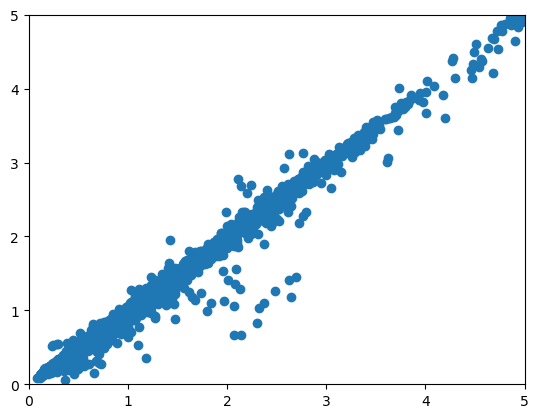

In [63]:
# how did we do!?
plt.scatter(
    testtargetds,
    oni_predictions
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [64]:
samevaltest = []
for m in range(len(testds)):
 samevaltest.append(testds[m][3][2])

In [65]:
samevaltest[0:20]

[0.58,
 0.57,
 0.56,
 0.57,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.55,
 0.56,
 0.54,
 0.55,
 0.56,
 0.55,
 0.55,
 0.55,
 0.55]

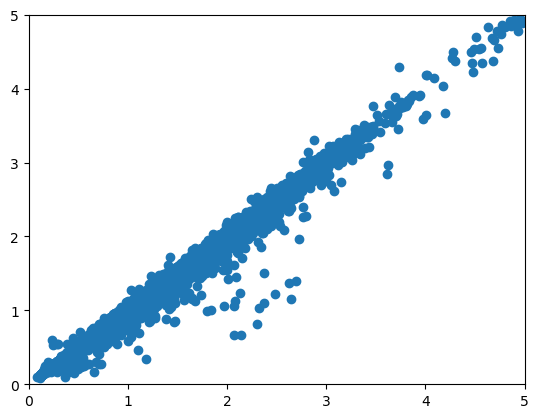

In [66]:
# how did we do!?
plt.scatter(
    testtargetds,
    samevaltest
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(testtargetds, samevaltest)

0.0002962616326530613

In [69]:
mean_squared_error(testtargetds, oni_predictions)

0.00022434674759908368

In [70]:
# reading datasets
dataset1 = pd.read_csv(
    '01302020PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo1 = pd.read_csv(
    '01302020Discharge2010-2023.csv',
    delimiter=',')
datasetthree1 = pd.read_csv(
    '01302020GageHeight2010-2023.csv',
    delimiter=',')

In [71]:
# drop any nans
dataset1 = dataset1.dropna(subset=["PRECTOTCORR"])

In [72]:
k = 0
n = 0
train = []
target = []
for x in dataset1["Time2"]:
  check = []
  try:
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x)[0][0]]])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+1)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+1)[0][0]]])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+2)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+2)[0][0]]])
    check.append([dataset1["PRECTOTCORR"][np.where(dataset1["Time2"]==x)[0][0]], datasettwo1["106410_00060"][np.where(datasettwo1["Time2"]==x+3)[0][0]], datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+3)[0][0]]])
    check.append(datasetthree1["106409_00065"][np.where(datasetthree1["Time2"]==x+5)[0][0]])
    train.append(check[0:4])
    target.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

122395


In [73]:
for m in range(len(train)):
  for n in range(4):
    train[m][n][1] = (train[m][n][1])/3000

In [74]:
train[0:5][:][:]

[[[0.14, 0.03163333333333333, 0.97],
  [0.14, 0.03163333333333333, 0.97],
  [0.14, 0.03163333333333333, 0.97],
  [0.14, 0.03163333333333333, 0.97]],
 [[0.28, 0.03163333333333333, 0.97],
  [0.28, 0.03163333333333333, 0.97],
  [0.28, 0.03163333333333333, 0.97],
  [0.28, 0.03163333333333333, 0.97]],
 [[0.33, 0.03163333333333333, 0.97],
  [0.33, 0.03163333333333333, 0.97],
  [0.33, 0.03163333333333333, 0.97],
  [0.33, 0.0308, 0.96]],
 [[0.28, 0.0308, 0.96],
  [0.28, 0.0308, 0.96],
  [0.28, 0.0308, 0.96],
  [0.28, 0.0308, 0.96]],
 [[0.22, 0.0308, 0.96],
  [0.22, 0.0308, 0.96],
  [0.22, 0.0308, 0.96],
  [0.22, 0.0308, 0.96]]]

In [75]:
trainds = train[0:math.ceil(0.75*len(train))]
traintargetds = target[0:math.ceil(0.75*len(target))]
testds = train[math.ceil(0.75*len(train)):]
testtargetds = target[math.ceil(0.75*len(target)):]

In [76]:
trainds = np.array(trainds)
traintargetds = np.array(traintargetds).T
testds = np.array(testds)
testtargetds = np.array(testtargetds).T

In [77]:
# for help with data manipulation for time series rnn training; we can use the time series generator from keras

# dummy input for understanding
# data = np.array([[i] for i in range(50)])

# here goes our training data
data = trainds

# the shape of your target is your prediction shape (e.g., here we make it 1)
#target = data

# the length of the input feature
n_input=4 # you can change this! doesn't HAVE to be 4 months input
n_features=data.shape[1]*data.shape[2]

# this is the generator that will go into our rnn for training
#data_gen = TimeseriesGenerator(data,
#                               traintargetds,
#                               length=n_input,
#                               sampling_rate=1,
#                               batch_size=1000, # you can try different batch sizes
#                               shuffle=True)

In [78]:
# many-to-one example
# lets make our rnn!
regressor = Sequential()

# LSTM; input shape is 1 (for one time step at a time) and n_features which is also 1 for our toy example
regressor.add(keras.layers.Input(shape=(1, 3)))

# don't return sequence; just the last output of the input sequence
regressor.add(LSTM(units=128, return_sequences=False))

regressor.add(Dense(64))
regressor.add(Activation('linear'))

regressor.add(Dense(8))
regressor.add(Activation('linear'))

# one neuron for output prediction
regressor.add(Dense(1))
regressor.add(Activation('linear'))

METRICS = [
    keras.metrics.MeanSquaredError(name='mean_squared_error'),
    keras.metrics.RootMeanSquaredError(name='root_mean_squared_error'),
]

# compile model
regressor.compile(keras.optimizers.Adam(learning_rate=0.002), loss='mean_squared_error', metrics=METRICS)

keras.utils.set_random_seed(1010)

# what does graph look like?
regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,369 (298.32 KB)

 Trainable params: 76,369 (298.32 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# train the lstm!
history = regressor.fit(x = trainds, y = traintargetds, validation_split=0.2, epochs=80, batch_size = 2000, shuffle=True)

Epoch 1/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.1457 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3564 - val_loss: 0.0050 - val_mean_squared_error: 0.0054 - val_root_mean_squared_error: 0.0735
Epoch 2/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0532 - val_loss: 0.0017 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 3/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0016 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0417
Epoch 4/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0016 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0413
Epoch 5/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - root_mean_squared_erro

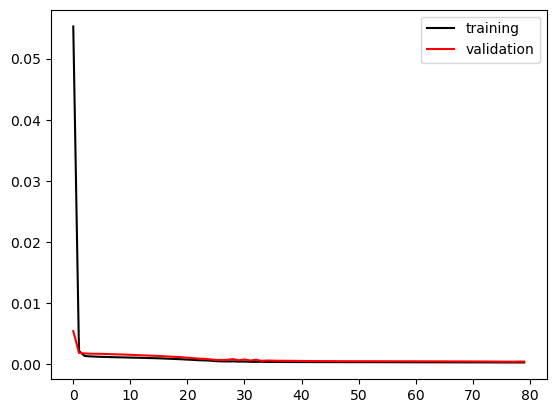

In [80]:
plt.plot(history.history["mean_squared_error"], c='k', label='training')
plt.plot(history.history["val_mean_squared_error"], c='r', label='validation')
plt.legend(['training', 'validation'])
plt.show()

In [81]:
# predict using test data
oni_predictions = regressor.predict(testds)

957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [82]:
train_predictions = regressor.predict(trainds)

2869/2869 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


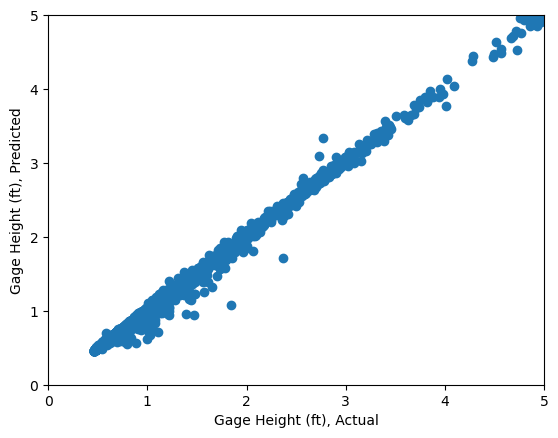

In [83]:
# how did we do!?
plt.scatter(
    testtargetds,
    oni_predictions
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel("Gage Height (ft), Actual")
plt.ylabel("Gage Height (ft), Predicted")
plt.show()

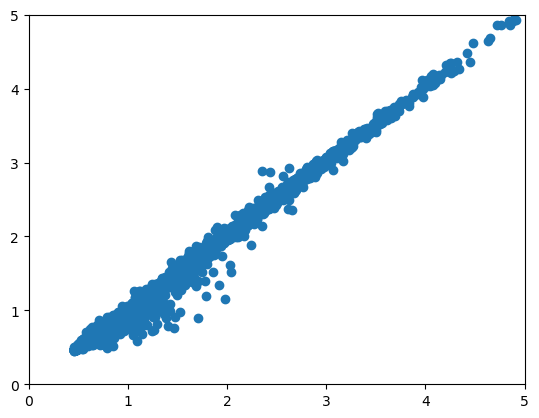

In [84]:
# how did we train!?
plt.scatter(
    traintargetds,
    train_predictions
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [85]:
samevaltest = []
for m in range(len(testds)):
 samevaltest.append(testds[m][3][2])

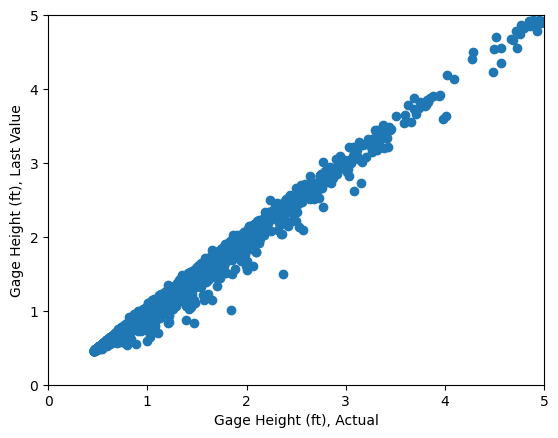

In [86]:
# how did we do!?
plt.scatter(
    testtargetds,
    samevaltest
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel("Gage Height (ft), Actual")
plt.ylabel("Gage Height (ft), Last Value")
plt.show()

In [87]:
samevaltest2 = []
for m in range(len(trainds)):
 samevaltest2.append(trainds[m][3][2])

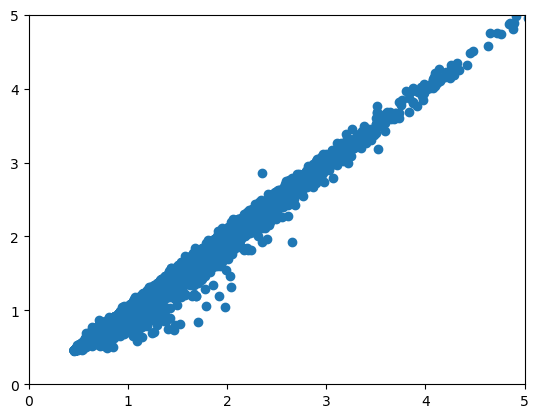

In [88]:
# how did we do!?
plt.scatter(
    traintargetds,
    samevaltest2
    )
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [89]:
mean_squared_error(testtargetds, samevaltest)

0.0006606314138178967

In [90]:
mean_squared_error(testtargetds, oni_predictions)

0.00032060053713719495

In [91]:
mean_squared_error(traintargetds, samevaltest2)

0.0005478065731995598

In [92]:
mean_squared_error(traintargetds, train_predictions)

0.0002935652043371892

In [93]:
testds[1:100][:][2]

array([[0.05      , 0.00683333, 0.56      ],
       [0.05      , 0.00683333, 0.56      ],
       [0.05      , 0.00683333, 0.56      ],
       [0.05      , 0.00723333, 0.57      ]])